In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
data= pd.read_csv("./data/Mall_Customers.csv")

In [ ]:
data.head(10)

In [9]:
# We will drop 'CustomerID' and 'Gender'
data.drop(['CustomerID',],axis=1,inplace=True)
data.drop(['Gender',],axis=1,inplace=True)



In [ ]:
data.info(verbose=True)

There is no NULL value in our data

# Data Exploration

In [11]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


There is no significant correlation between any two features, so we will not drop any

In [13]:
# Let's, Standardize our data
scaler=StandardScaler()
scaled_values=scaler.fit_transform(data)
X=pd.DataFrame(scaled_values,index=data.index,columns=data.columns)

In [14]:
X.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


We can see our data is stantadize to have 0 mean and unit deviation

### Let's plot our data

Text(0.5, 0, 'Spending Score (1-100)')

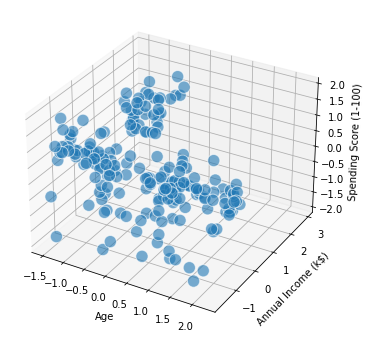

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = X['Age']
y = X['Annual Income (k$)']
z = X['Spending Score (1-100)']
ax.scatter(x, y, z, s=150, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

Now We'll cluster our data using sklearn library

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans=KMeans(n_clusters=3)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=3)

Text(0.5, 0, 'Spending Score (1-100)')

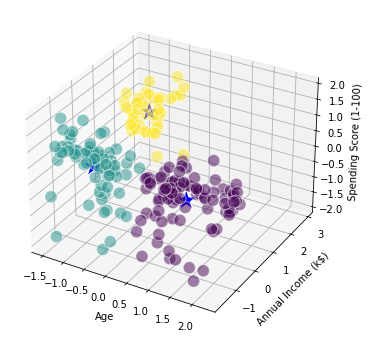

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = X['Age']
y = X['Annual Income (k$)']
z = X['Spending Score (1-100)']

ax.scatter(x, y, z, s=150, alpha=0.5, edgecolors='w',c= kmeans.labels_)

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=500, alpha=1, edgecolors='w',c='b',marker='*')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')